## 1、导入模块&加载数据

In [1]:
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns

data_1 = pd.read_excel('data/online_retail_II.xlsx',sheet_name='Year 2009-2010')
data_2 = pd.read_excel('data/online_retail_II.xlsx',sheet_name='Year 2010-2011')

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
#plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

- 2009-2010年和2010-2011的销售记录, 将它们合并到一个DataFrame中

In [3]:
data = pd.concat([data_1, data_2], ignore_index=True)

In [4]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## 2、数据清洗

- 将后续用不到的字段Country去掉, 为了方便大家对代码的理解把列名换为中文

In [5]:
retail_data = data[['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','Price', 'Customer ID']]
retail_data.columns = ['订单编号','商品编号','商品描述','购买数量','购买时间','商品单价','用户ID']
retail_data.head()

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0


In [6]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   订单编号    1067371 non-null  object        
 1   商品编号    1067371 non-null  object        
 2   商品描述    1062989 non-null  object        
 3   购买数量    1067371 non-null  int64         
 4   购买时间    1067371 non-null  datetime64[ns]
 5   商品单价    1067371 non-null  float64       
 6   用户ID    824364 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 57.0+ MB


- 查看数据分布情况

In [7]:
retail_data['购买时间'].describe()

<ipython-input-7-9b5ae811ed9b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  retail_data['购买时间'].describe()


count                 1067371
unique                  47635
top       2010-12-06 16:57:00
freq                     1350
first     2009-12-01 07:45:00
last      2011-12-09 12:50:00
Name: 购买时间, dtype: object

- 发现购买数量和 商品单价最小值均小于零

In [8]:
retail_data.describe()

,购买数量,商品单价,用户ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [9]:
retail_data.query('购买数量<0')

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0
...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0


- price小于零的是坏账调整，我们把购买数量<0 和 商品单价<0的订单删除

In [10]:
retail_data.query('商品单价<0')

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN


In [11]:
retail_data_clean = retail_data[(retail_data['商品单价']>0) & (retail_data['购买数量']>0)]

In [12]:
retail_data_clean

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0
...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0


In [13]:
retail_data_clean.商品编号.value_counts()

85123A    5686
85099B    4124
22423     4061
21212     3290
20725     3179
          ... 
23628        1
84509e       1
84648        1
84867b       1
85171        1
Name: 商品编号, Length: 4917, dtype: int64

- 由于运费,包装费,银行的费用**一般都计入到GMV中**, 所以我们这里只是把['B','TEST001','TEST002'] 这几个去掉

In [14]:
retail_data_clean[retail_data_clean.商品编号 == 'POST']

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.0,12682.0
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.0,12533.0
1244,489557,POST,POSTAGE,4,2009-12-01 12:52:00,18.0,12490.0
...,...,...,...,...,...,...,...
1066677,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.0,12713.0


In [15]:
retail_data_clean[retail_data_clean.商品编号 == 'PADS']

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0


In [16]:
retail_data_clean = retail_data_clean.query("(商品编号!='B') and (商品编号!='TEST001') and (商品编号!='TEST002') ")
retail_data_clean.shape

(1041660, 7)

## 3、 计算月交易额(月GMV)
- 接下来我们添加一个字段，用来表示交易的月份:  

In [17]:
retail_data_clean['购买年月'] = retail_data_clean['购买时间'].astype('datetime64[M]')

<ipython-input-17-7cb3de3dac14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data_clean['购买年月'] = retail_data_clean['购买时间'].astype('datetime64[M]')


In [18]:
retail_data_clean

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID,购买年月
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,2009-12-01
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,2011-12-01
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,2011-12-01
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,2011-12-01
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,2011-12-01


- 用单价*数量计算每条交易记录的交易金额，然后按照月份分组，计算每月的总收入

In [19]:
retail_data_clean['金额'] = retail_data_clean['商品单价'] * retail_data_clean['购买数量']

<ipython-input-19-766cab17250a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data_clean['金额'] = retail_data_clean['商品单价'] * retail_data_clean['购买数量']


In [20]:
retail_data_clean

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID,购买年月,金额
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,2009-12-01,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009-12-01,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009-12-01,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,2009-12-01,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,2009-12-01,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,2011-12-01,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,2011-12-01,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,2011-12-01,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,2011-12-01,14.85


- 将每笔交易按照购买年月进行分组, 计算每月的总交易金额(月GMV) 

In [21]:
gmv_m = retail_data_clean.groupby(['购买年月'])['金额'].sum().reset_index()

In [22]:
gmv_m.columns = ['购买年月', '月GMV']

In [23]:
gmv_m

,购买年月,月GMV
0,2009-12-01,825572.260
1,2010-01-01,652618.502
2,2010-02-01,553713.306
3,2010-03-01,833570.131
4,2010-04-01,681506.492
5,2010-05-01,659858.860
6,2010-06-01,752270.140
7,2010-07-01,650712.940
8,2010-08-01,697274.910
9,2010-09-01,924333.011


- 使用pandas, 对结果做可视化

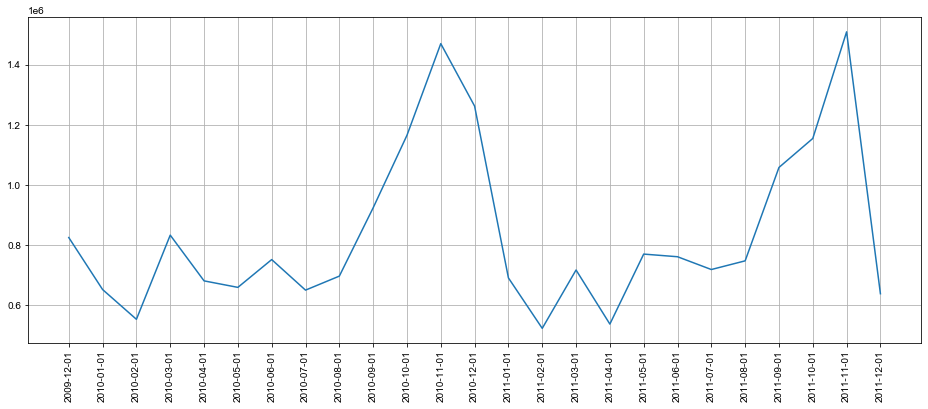

In [24]:
x_label = gmv_m.购买年月.astype(str).to_list() # 使用购买年月的数据作为X轴显示的标签 
plt.figure(figsize=(16,6))# 设置画布大小
gmv_m['月GMV'].plot() # 对金额列绘制折线图
plt.xticks(range(0,25),x_label,rotation=90) # 设置X轴标签, 参数1 当前的标签(从0开始的数字) 参数2 要替换的标签, 参数3 rotation 标签字体旋转45度
plt.grid(True) # 显示网格线

## 4、计算月销售额环比

In [25]:
pd.Series.pct_change?

Signature:
pd.Series.pct_change(
    self: 'FrameOrSeries',
    periods=1,
    fill_method='pad',
    limit=None,
    freq=None,
    **kwargs,
) -> 'FrameOrSeries'
Docstring:
Percentage change between the current and a prior element.

Computes the percentage change from the immediately previous row by
default. This is useful in comparing the percentage of change in a time
series of elements.

Parameters
----------
periods : int, default 1
    Periods to shift for forming percent change.
fill_method : str, default 'pad'
    How to handle NAs before computing percent changes.
limit : int, default None
    The number of consecutive NAs to fill before stopping.
freq : DateOffset, timedelta, or str, optional
    Increment to use from time series API (e.g. 'M' or BDay()).
**kwargs
    Additional keyword arguments are passed into
    `DataFrame.shift` or `Series.shift`.

Returns
-------
chg : Series or DataFrame
    The same type as the calling object.

See Also
--------
Series.diff : Compute

In [26]:
gmv_m['月GMV'].pct_change()

0          NaN
1    -0.209496
2    -0.151551
3     0.505418
4    -0.182425
5    -0.031764
6     0.140047
7    -0.135001
8     0.071555
9     0.325636
10    0.260892
11    0.261512
12   -0.141248
13   -0.452427
14   -0.242611
15    0.370504
16   -0.250587
17    0.432733
18   -0.011416
19   -0.055818
20    0.040120
21    0.415083
22    0.091054
23    0.306947
24   -0.576805
Name: 月GMV, dtype: float64

In [27]:
gmv_m['月销售额环比'] = gmv_m['月GMV'].pct_change()
gmv_m

,购买年月,月GMV,月销售额环比
0,2009-12-01,825572.260,NaN
1,2010-01-01,652618.502,-0.209496
2,2010-02-01,553713.306,-0.151551
3,2010-03-01,833570.131,0.505418
4,2010-04-01,681506.492,-0.182425
5,2010-05-01,659858.860,-0.031764
6,2010-06-01,752270.140,0.140047
7,2010-07-01,650712.940,-0.135001
8,2010-08-01,697274.910,0.071555
9,2010-09-01,924333.011,0.325636


- 绘制图形，可视化月销售额环比数据

In [28]:
x_label

['2009-12-01',
 '2010-01-01',
 '2010-02-01',
 '2010-03-01',
 '2010-04-01',
 '2010-05-01',
 '2010-06-01',
 '2010-07-01',
 '2010-08-01',
 '2010-09-01',
 '2010-10-01',
 '2010-11-01',
 '2010-12-01',
 '2011-01-01',
 '2011-02-01',
 '2011-03-01',
 '2011-04-01',
 '2011-05-01',
 '2011-06-01',
 '2011-07-01',
 '2011-08-01',
 '2011-09-01',
 '2011-10-01',
 '2011-11-01',
 '2011-12-01']

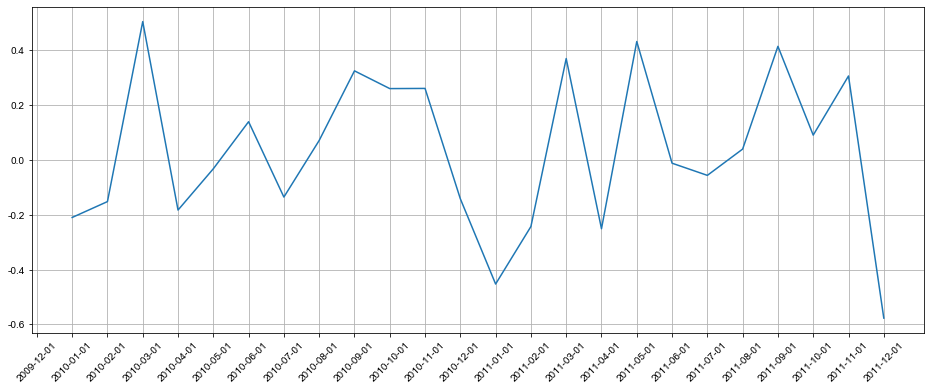

In [29]:
plt.figure(figsize=(16,6))
gmv_m['月销售额环比'].plot()
plt.xticks(range(0,25),x_label,rotation=45)
plt.grid(True)

## 5、月均活跃用户分析
- 我们分析一下月均活跃用户的情况，由于我们的数据中用户编号有缺失，我们把这部分缺失数据删除
- 数据中只有购买记录，没有其它记录，所以我们**用购买行为来定义活跃**

In [30]:
retail_data_clean.dropna(subset=['用户ID'], inplace=True)

<ipython-input-30-bfa0d7a23125>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data_clean.dropna(subset=['用户ID'], inplace=True)


In [31]:
retail_data_clean

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID,购买年月,金额
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,2009-12-01,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009-12-01,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009-12-01,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,2009-12-01,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,2009-12-01,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,2011-12-01,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,2011-12-01,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,2011-12-01,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,2011-12-01,14.85


In [32]:
mau = retail_data_clean.groupby('购买年月')['用户ID'].nunique().reset_index()

In [33]:
mau.columns = ['购买年月','用户数']

In [34]:
mau

,购买年月,用户数
0,2009-12-01,954
1,2010-01-01,719
2,2010-02-01,772
3,2010-03-01,1057
4,2010-04-01,942
5,2010-05-01,966
6,2010-06-01,1041
7,2010-07-01,928
8,2010-08-01,911
9,2010-09-01,1145


- Pandas绘图展示月活变化情况

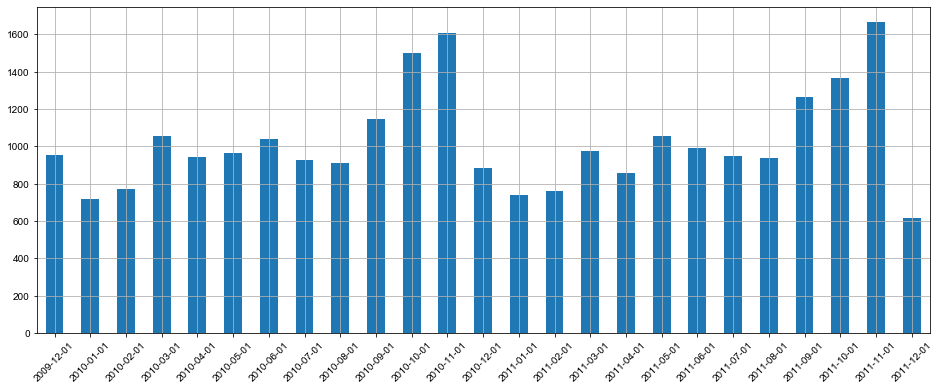

In [35]:
plt.figure(figsize=(16,6))
mau['用户数'].plot(kind = 'bar')
plt.xticks(range(0,25),x_label,rotation=45)
plt.grid(True)

## 6、月客单价(活跃用户平均消费金额)
- 客单价 = 月GMV/月活跃用户数

In [36]:
final = mau.merge(gmv_m,on='购买年月')

In [37]:
final

,购买年月,用户数,月GMV,月销售额环比
0,2009-12-01,954,825572.260,NaN
1,2010-01-01,719,652618.502,-0.209496
2,2010-02-01,772,553713.306,-0.151551
3,2010-03-01,1057,833570.131,0.505418
4,2010-04-01,942,681506.492,-0.182425
5,2010-05-01,966,659858.860,-0.031764
6,2010-06-01,1041,752270.140,0.140047
7,2010-07-01,928,650712.940,-0.135001
8,2010-08-01,911,697274.910,0.071555
9,2010-09-01,1145,924333.011,0.325636


In [38]:
final['客单价']=final['月GMV']/final['用户数']

In [39]:
final

,购买年月,用户数,月GMV,月销售额环比,客单价
0,2009-12-01,954,825572.260,NaN,865.379727
1,2010-01-01,719,652618.502,-0.209496,907.675246
2,2010-02-01,772,553713.306,-0.151551,717.245215
3,2010-03-01,1057,833570.131,0.505418,788.618856
4,2010-04-01,942,681506.492,-0.182425,723.467614
5,2010-05-01,966,659858.860,-0.031764,683.083706
6,2010-06-01,1041,752270.140,0.140047,722.641825
7,2010-07-01,928,650712.940,-0.135001,701.199289
8,2010-08-01,911,697274.910,0.071555,765.395071
9,2010-09-01,1145,924333.011,0.325636,807.277739


- 可视化

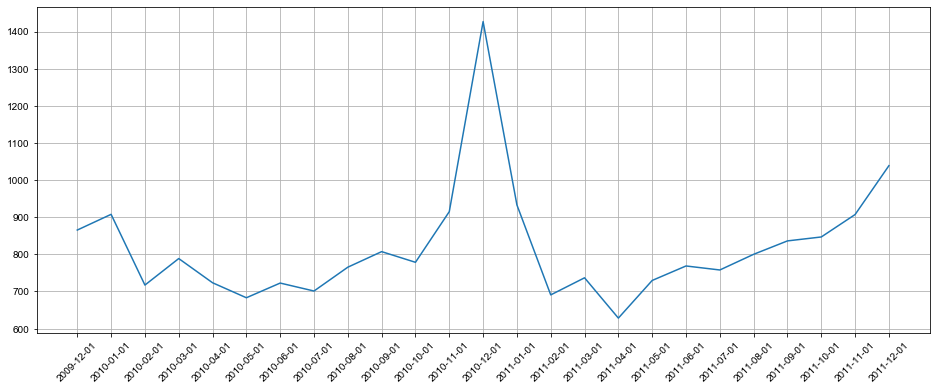

In [40]:
plt.figure(figsize=(16,6))
final['客单价'].plot()
plt.xticks(range(0,25),x_label,rotation=45)
plt.grid(True)

- 从上图中看出, 对比3月和4月的数据，客单价也有所下降

## 7、新用户占比

- 区分新老用户
- 找到每个用户第一次购买的日期

In [41]:
retail = retail_data_clean.groupby('用户ID').购买时间.min().reset_index()

In [43]:
retail.columns = ['用户ID','首次购买时间']

In [47]:
retail['首次购买年月'] = retail['首次购买时间'].astype('datetime64[M]')

In [49]:
retail

,用户ID,首次购买时间,首次购买年月
0,12346.0,2010-03-02 13:08:00,2010-03-01
1,12347.0,2010-10-31 14:20:00,2010-10-01
2,12348.0,2010-09-27 14:59:00,2010-09-01
3,12349.0,2010-04-29 13:20:00,2010-04-01
4,12350.0,2011-02-02 16:01:00,2011-02-01
...,...,...,...
5873,18283.0,2010-02-19 17:16:00,2010-02-01
5874,18284.0,2010-10-04 11:33:00,2010-10-01
5875,18285.0,2010-02-17 10:24:00,2010-02-01
5876,18286.0,2009-12-16 10:45:00,2009-12-01


- 将首次购买日期的数据与原始数据合并

In [134]:
retail

,用户ID,首次购买时间,首次购买年月,注册年月,安装年月,渠道
0,12346.0,2010-03-02 13:08:00,2010-03-01,2010-01-01,2010-01-01,抖音
1,12347.0,2010-10-31 14:20:00,2010-10-01,2010-09-01,2010-06-01,百度
2,12348.0,2010-09-27 14:59:00,2010-09-01,2009-12-01,2009-12-01,微信
3,12349.0,2010-04-29 13:20:00,2010-04-01,2009-12-01,2009-12-01,微信
4,12350.0,2011-02-02 16:01:00,2011-02-01,2010-11-01,2010-02-01,微信
...,...,...,...,...,...,...
5873,18283.0,2010-02-19 17:16:00,2010-02-01,2010-02-01,2010-02-01,抖音
5874,18284.0,2010-10-04 11:33:00,2010-10-01,2010-04-01,2010-02-01,抖音
5875,18285.0,2010-02-17 10:24:00,2010-02-01,2009-12-01,2009-12-01,百度
5876,18286.0,2009-12-16 10:45:00,2009-12-01,2009-12-01,2009-12-01,百度


In [51]:
retail_data_clean = retail_data_clean.merge(retail, on='用户ID')

In [52]:
retail_data_clean

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID,购买年月,金额,首次购买时间,首次购买年月
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,2009-12-01,83.40,2009-12-01 07:45:00,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009-12-01,81.00,2009-12-01 07:45:00,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009-12-01,81.00,2009-12-01 07:45:00,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,2009-12-01,100.80,2009-12-01 07:45:00,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,2009-12-01,30.00,2009-12-01 07:45:00,2009-12-01
...,...,...,...,...,...,...,...,...,...,...,...
805534,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,2011-12-01,15.00,2011-12-09 12:16:00,2011-12-01
805535,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,2011-12-01,10.20,2011-12-09 12:16:00,2011-12-01
805536,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,2011-12-01,10.20,2011-12-09 12:16:00,2011-12-01
805537,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,2011-12-01,24.96,2011-12-09 12:16:00,2011-12-01


- 创建`用户类型`字段来区分新老用户

In [53]:
retail_data_clean['用户类型'] = '新用户'

In [54]:
type(retail_data_clean['购买年月'])

pandas.core.series.Series

In [56]:
retail_data_clean['购买年月']>retail_data_clean['首次购买年月']

0         False
1         False
2         False
3         False
4         False
          ...  
805534    False
805535    False
805536    False
805537    False
805538    False
Length: 805539, dtype: bool

In [76]:
retail_data_clean.loc[0, '订单编号']

489434

In [ ]:
retail_data_clean.loc

In [77]:
retail_data_clean['购买年月']>retail_data_clean['首次购买年月']

0         False
1         False
2         False
3         False
4         False
          ...  
805534    False
805535    False
805536    False
805537    False
805538    False
Length: 805539, dtype: bool

In [58]:
retail_data_clean.loc[retail_data_clean['购买年月']>retail_data_clean['首次购买年月'], '用户类型'] = '老用户'


In [61]:
retail_data_clean[retail_data_clean['用户类型'] == '老用户']

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID,购买年月,金额,首次购买时间,首次购买年月,用户类型
26,496092,21871,SAVE THE PLANET MUG,24,2010-01-29 10:06:00,1.25,13085.0,2010-01-01,30.00,2009-12-01 07:45:00,2009-12-01,老用户
27,496092,22244,"HOOK, 3 HANGER ,MAGIC GARDEN",12,2010-01-29 10:06:00,1.95,13085.0,2010-01-01,23.40,2009-12-01 07:45:00,2009-12-01,老用户
28,496092,22245,"HOOK, 1 HANGER ,MAGIC GARDEN",12,2010-01-29 10:06:00,0.85,13085.0,2010-01-01,10.20,2009-12-01 07:45:00,2009-12-01,老用户
29,496092,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2010-01-29 10:06:00,2.95,13085.0,2010-01-01,17.70,2009-12-01 07:45:00,2009-12-01,老用户
30,496092,22328,ROUND SNACK BOXES SET OF 4 FRUITS,6,2010-01-29 10:06:00,2.95,13085.0,2010-01-01,17.70,2009-12-01 07:45:00,2009-12-01,老用户
...,...,...,...,...,...,...,...,...,...,...,...,...
804853,580069,23291,DOLLY GIRL CHILDRENS CUP,1,2011-12-01 13:47:00,1.25,15060.0,2011-12-01,1.25,2011-11-30 14:03:00,2011-11-01,老用户
804854,580069,23292,SPACEBOY CHILDRENS CUP,1,2011-12-01 13:47:00,1.25,15060.0,2011-12-01,1.25,2011-11-30 14:03:00,2011-11-01,老用户
804855,580069,23499,SET 12 VINTAGE DOILY CHALK,1,2011-12-01 13:47:00,0.42,15060.0,2011-12-01,0.42,2011-11-30 14:03:00,2011-11-01,老用户
804856,580069,21916,SET 12 RETRO WHITE CHALK STICKS,1,2011-12-01 13:47:00,0.42,15060.0,2011-12-01,0.42,2011-11-30 14:03:00,2011-11-01,老用户


In [62]:
retail_data_clean.用户类型.value_counts()

老用户    635672
新用户    169867
Name: 用户类型, dtype: int64

- 接下来我们统计新用户和老用户的销售额

In [86]:
temp = retail_data_clean.iloc[:5, :2].copy()

In [90]:
temp.订单编号 = temp.订单编号.astype('int64')

In [91]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   订单编号    5 non-null      int64 
 1   商品编号    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [94]:
temp

,订单编号,商品编号
0,489434,85048
1,489434,79323P
2,489434,79323W
3,489434,22041
4,489434,21232


In [93]:
temp.订单编号.apply(lambda x: x+1)

0    489435
1    489435
2    489435
3    489435
4    489435
Name: 订单编号, dtype: int64

In [82]:
pd.DataFrame.apply?

Signature:
pd.DataFrame.apply(
    self,
    func,
    axis=0,
    raw=False,
    result_type=None,
    args=(),
    **kwds,
)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns': apply function to each row.

raw : bool, default False
    Determines if row or column is passed as a Series or ndarray object:

    * ``False`` : passes each row or column as a Series to the
      function.
    * ``True`` : the passed functio

In [78]:
retail_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805539 entries, 0 to 805538
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   订单编号    805539 non-null  object        
 1   商品编号    805539 non-null  object        
 2   商品描述    805539 non-null  object        
 3   购买数量    805539 non-null  int64         
 4   购买时间    805539 non-null  datetime64[ns]
 5   商品单价    805539 non-null  float64       
 6   用户ID    805539 non-null  float64       
 7   购买年月    805539 non-null  datetime64[ns]
 8   金额      805539 non-null  float64       
 9   首次购买时间  805539 non-null  datetime64[ns]
 10  首次购买年月  805539 non-null  datetime64[ns]
 11  用户类型    805539 non-null  object        
dtypes: datetime64[ns](4), float64(3), int64(1), object(4)
memory usage: 96.0+ MB


In [65]:
retail_data_clean

,订单编号,商品编号,商品描述,购买数量,购买时间,商品单价,用户ID,购买年月,金额,首次购买时间,首次购买年月,用户类型
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,2009-12-01,83.40,2009-12-01 07:45:00,2009-12-01,新用户
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009-12-01,81.00,2009-12-01 07:45:00,2009-12-01,新用户
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,2009-12-01,81.00,2009-12-01 07:45:00,2009-12-01,新用户
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,2009-12-01,100.80,2009-12-01 07:45:00,2009-12-01,新用户
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,2009-12-01,30.00,2009-12-01 07:45:00,2009-12-01,新用户
...,...,...,...,...,...,...,...,...,...,...,...,...
805534,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,2011-12-01,15.00,2011-12-09 12:16:00,2011-12-01,新用户
805535,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,2011-12-01,10.20,2011-12-09 12:16:00,2011-12-01,新用户
805536,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,2011-12-01,10.20,2011-12-09 12:16:00,2011-12-01,新用户
805537,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,2011-12-01,24.96,2011-12-09 12:16:00,2011-12-01,新用户


In [67]:
revenue = retail_data_clean.groupby(['购买年月', '用户类型'])['金额'].sum().reset_index()

In [68]:
revenue

,购买年月,用户类型,金额
0,2009-12-01,新用户,686540.660
1,2010-01-01,新用户,161893.491
2,2010-01-01,老用户,395335.571
3,2010-02-01,新用户,170434.884
4,2010-02-01,老用户,335936.182
5,2010-03-01,新用户,235494.111
6,2010-03-01,老用户,464114.880
7,2010-04-01,新用户,125078.231
8,2010-04-01,老用户,469508.461
9,2010-05-01,新用户,110770.000


- 由于2009年12月和2011年12月的数据不全，我们不处理这两部分数据

In [69]:
revenue = revenue.query("购买年月 != '2009-12-01' and 购买年月 != '2011-12-01'")

In [70]:
revenue

,购买年月,用户类型,金额
1,2010-01-01,新用户,161893.491
2,2010-01-01,老用户,395335.571
3,2010-02-01,新用户,170434.884
4,2010-02-01,老用户,335936.182
5,2010-03-01,新用户,235494.111
6,2010-03-01,老用户,464114.880
7,2010-04-01,新用户,125078.231
8,2010-04-01,老用户,469508.461
9,2010-05-01,新用户,110770.000
10,2010-05-01,老用户,489215.790


- 这里我们需要把新老用户的购买情况都绘制到一张图表中

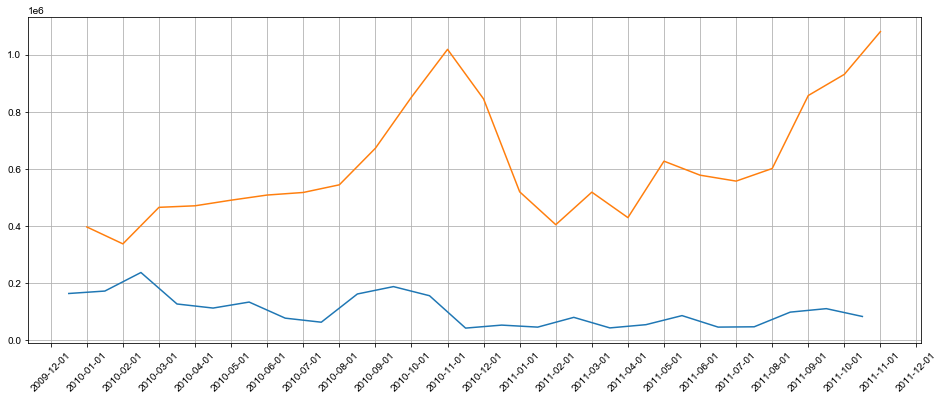

In [73]:
plt.figure(figsize=(16,6))
revenue[revenue['用户类型']=='新用户']['金额'].plot()
revenue[revenue['用户类型']=='老用户']['金额'].plot()
plt.xticks(range(0,50,2),x_label,rotation=45)
plt.grid(True)

- 新用户占比= 每月新用户/每月有购买的总用户数

In [97]:
user_ratio = retail_data_clean.query("用户类型 == '新用户'").groupby('购买年月')['用户ID'].nunique().reset_index()

In [99]:
user_ratio.columns = ['购买年月','新用户数']

In [103]:
user_ratio['总用户'] = retail_data_clean.groupby(['购买年月'])['用户ID'].nunique().values

In [104]:
user_ratio

,购买年月,新用户数,总用户
0,2009-12-01,954,954
1,2010-01-01,383,719
2,2010-02-01,374,772
3,2010-03-01,444,1057
4,2010-04-01,294,942
5,2010-05-01,254,966
6,2010-06-01,270,1041
7,2010-07-01,186,928
8,2010-08-01,162,911
9,2010-09-01,243,1145


In [105]:
user_ratio[13:-1] # 数据切片, 截取2011-01 以后的数据

,购买年月,新用户数,总用户
13,2011-01-01,71,741
14,2011-02-01,124,758
15,2011-03-01,179,974
16,2011-04-01,106,856
17,2011-05-01,111,1056
18,2011-06-01,108,991
19,2011-07-01,102,949
20,2011-08-01,106,935
21,2011-09-01,189,1266
22,2011-10-01,221,1364


In [106]:
plot_data = user_ratio[13:-1] 

In [109]:
plot_data.index = plot_data['购买年月'].astype(str).to_list()

In [110]:
plot_data

,购买年月,新用户数,总用户
2011-01-01,2011-01-01,71,741
2011-02-01,2011-02-01,124,758
2011-03-01,2011-03-01,179,974
2011-04-01,2011-04-01,106,856
2011-05-01,2011-05-01,111,1056
2011-06-01,2011-06-01,108,991
2011-07-01,2011-07-01,102,949
2011-08-01,2011-08-01,106,935
2011-09-01,2011-09-01,189,1266
2011-10-01,2011-10-01,221,1364


- 数据可视化

In [112]:
plot_data['新用户占比'] = plot_data['新用户数'] / plot_data['总用户']

<ipython-input-112-66b6bafda2b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['新用户占比'] = plot_data['新用户数'] / plot_data['总用户']


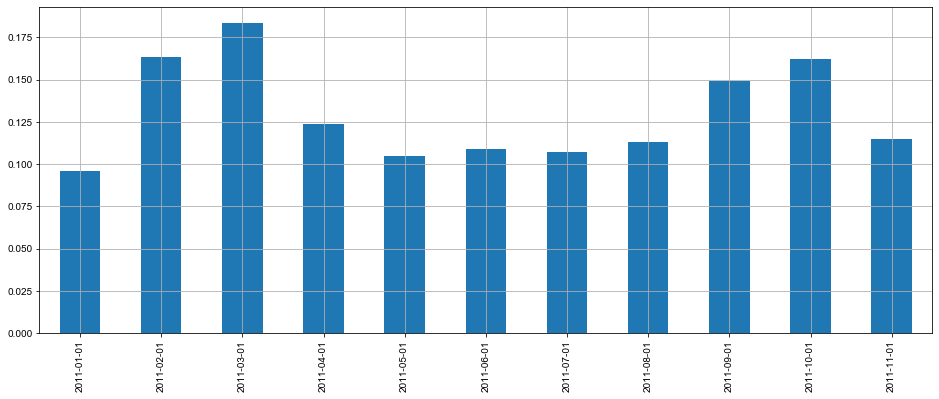

In [113]:
plt.figure(figsize=(16, 6))
plot_data['新用户占比'].plot(kind='bar')
plt.grid(True)

## 8、激活率计算

- 加载用户注册日期数据

In [114]:
retail= pd.read_csv('data/retail_user_data.csv')
retail

,用户ID,首次购买时间,首次购买年月,注册年月,安装年月,渠道
0,12346.0,2010-03-02 13:08:00,2010-03-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,抖音
1,12347.0,2010-10-31 14:20:00,2010-10-01 00:00:00,2010-09-01 00:00:00,2010-06-01 00:00:00,百度
2,12348.0,2010-09-27 14:59:00,2010-09-01 00:00:00,2009-12-01 00:00:00,2009-12-01 00:00:00,微信
3,12349.0,2010-04-29 13:20:00,2010-04-01 00:00:00,2009-12-01 00:00:00,2009-12-01 00:00:00,微信
4,12350.0,2011-02-02 16:01:00,2011-02-01 00:00:00,2010-11-01 00:00:00,2010-02-01 00:00:00,微信
...,...,...,...,...,...,...
5873,18283.0,2010-02-19 17:16:00,2010-02-01 00:00:00,2010-02-01 00:00:00,2010-02-01 00:00:00,抖音
5874,18284.0,2010-10-04 11:33:00,2010-10-01 00:00:00,2010-04-01 00:00:00,2010-02-01 00:00:00,抖音
5875,18285.0,2010-02-17 10:24:00,2010-02-01 00:00:00,2009-12-01 00:00:00,2009-12-01 00:00:00,百度
5876,18286.0,2009-12-16 10:45:00,2009-12-01 00:00:00,2009-12-01 00:00:00,2009-12-01 00:00:00,百度


- 加载数据之后我们发现首次购买年月, 注册年月,安装年月字段包含了具体时刻信息, 我们把时刻数据去掉

In [115]:
retail['首次购买年月'] = retail['首次购买年月'].astype('datetime64[M]')
retail['注册年月'] = retail['注册年月'].astype('datetime64[M]')
retail['安装年月'] = retail['安装年月'].astype('datetime64[M]')

- 计算用户激活率

In [116]:
activation_count = retail[retail['首次购买年月'] == retail['注册年月']].groupby('注册年月')['用户ID'].count()

In [117]:
activation_count

注册年月
2009-12-01    954
2010-01-01    204
2010-02-01    131
2010-03-01    113
2010-04-01     60
2010-05-01     49
2010-06-01     42
2010-07-01     22
2010-08-01     12
2010-09-01     15
2010-10-01     29
2010-11-01     22
2010-12-01      7
2011-01-01      7
2011-02-01      7
2011-03-01      9
2011-04-01      8
2011-05-01     12
2011-06-01     11
2011-07-01      5
2011-08-01      5
2011-09-01      4
2011-10-01      8
2011-11-01     12
Name: 用户ID, dtype: int64

In [118]:
regist_count = retail.groupby('注册年月')['用户ID'].count()

In [119]:
regist_count

注册年月
2009-12-01    1733
2010-01-01     793
2010-02-01     619
2010-03-01     430
2010-04-01     353
2010-05-01     306
2010-06-01     256
2010-07-01     208
2010-08-01     170
2010-09-01     155
2010-10-01     149
2010-11-01     105
2010-12-01     102
2011-01-01      85
2011-02-01      65
2011-03-01      70
2011-04-01      50
2011-05-01      63
2011-06-01      47
2011-07-01      33
2011-08-01      29
2011-09-01      27
2011-10-01      17
2011-11-01      13
Name: 用户ID, dtype: int64

In [122]:
retail_activation = activation_count/regist_count

In [125]:
retail_activation = retail_activation.reset_index()

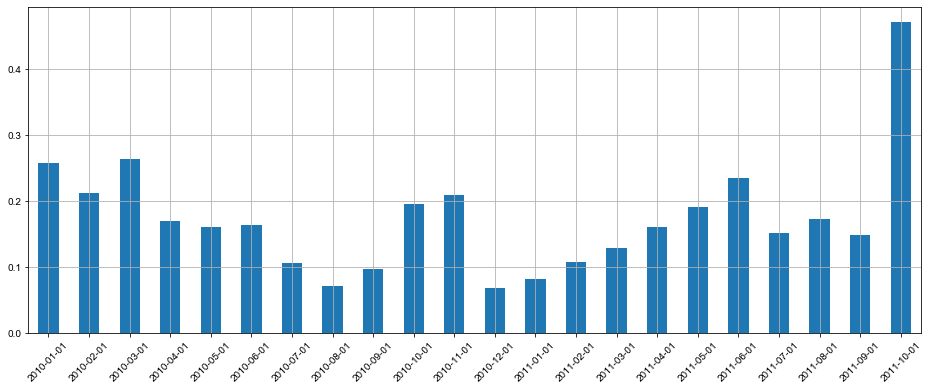

In [126]:
plot_data = retial_activation[1:-1].reset_index()
plt.figure(figsize=(16,6))
plot_data['用户ID'].plot(kind= 'bar')# 绘制柱状图, 默认会使用行索引作为X轴标签
x_label = plot_data['注册年月'].astype(str).to_list()
plt.xticks(plot_data.index, x_label,rotation=45)
plt.grid(True)

- 可以按照渠道这个维度来进一步拆解，看一看哪个渠道的用户质量高

In [127]:
#按渠道统计每月不同渠道的激活用户数
activation_count = retail[retail['首次购买年月'] == retail['注册年月']].groupby(['注册年月','渠道'])['用户ID'].count()
#按渠道统计每月注册用户数
regist_count = retail.groupby(['注册年月','渠道'])['用户ID'].count()
#计算不同渠道激活率
activation_ratio = activation_count/regist_count
activation_ratio = activation_ratio.reset_index()
activation_ratio

,注册年月,渠道,用户ID
0,2009-12-01,微信,0.558719
1,2009-12-01,抖音,0.540765
2,2009-12-01,百度,0.552632
3,2010-01-01,微信,0.229323
4,2010-01-01,抖音,0.263736
...,...,...,...
67,2011-10-01,抖音,0.500000
68,2011-10-01,百度,0.600000
69,2011-11-01,微信,1.000000
70,2011-11-01,抖音,0.666667


- 提取各渠道2010年的激活数据用于可视化

In [128]:
data_wechat = activation_ratio.query("注册年月>20091201 and 注册年月<20110101 and 渠道 == '微信'").reset_index()
data_baidu = activation_ratio.query("注册年月>20091201 and 注册年月<20110101 and 渠道 == '百度'").reset_index()
data_tiktok = activation_ratio.query("注册年月>20091201 and 注册年月<20110101 and 渠道 == '抖音'").reset_index()

In [132]:
data_wechat

,index,注册年月,渠道,用户ID
0,3,2010-01-01,微信,0.229323
1,6,2010-02-01,微信,0.191919
2,9,2010-03-01,微信,0.272059
3,12,2010-04-01,微信,0.192000
4,15,2010-05-01,微信,0.086022
5,18,2010-06-01,微信,0.123288
6,21,2010-07-01,微信,0.112676
7,24,2010-08-01,微信,0.067797
8,27,2010-09-01,微信,0.100000
9,30,2010-10-01,微信,0.153846


- 渠道激活率可视化

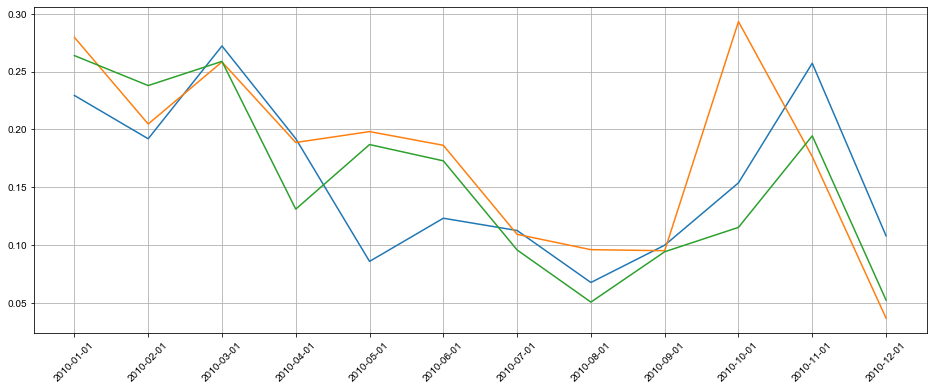

In [131]:
plt.figure(figsize=(16,6))
data_wechat['用户ID'].plot() # 微信渠道
data_baidu['用户ID'].plot() # 百度渠道
data_tiktok['用户ID'].plot() #抖音渠道
x_label = data_tiktok['注册年月'].astype(str).to_list() #获取年月信息作为行标签
plt.xticks(data_wechat.index, x_label,rotation=45) #设置X轴标签
plt.grid(True)

## 9、月留存率

- 首先我们来按月统计用户是否有购买的情况

In [135]:
user_purchase = retail_data_clean.groupby(['用户ID', '购买年月'])['购买数量'].sum().reset_index()

In [136]:
user_purchase

,用户ID,购买年月,购买数量
0,12346.0,2010-03-01,5
1,12346.0,2010-06-01,19
2,12346.0,2011-01-01,74215
3,12347.0,2010-10-01,509
4,12347.0,2010-12-01,638
...,...,...,...
25588,18287.0,2010-05-01,732
25589,18287.0,2010-09-01,508
25590,18287.0,2010-11-01,187
25591,18287.0,2011-05-01,488


- 提取出月份数据

In [137]:
#创建透视表,有购买的月份对购买数量求和, 没有购买的月份补0
user_retention = user_purchase.pivot_table(index = '用户ID',columns= '购买年月',values='购买数量').fillna(0)
user_retention

购买年月,2009-12-01,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,...,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
用户ID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,5.0,0.0,0.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,483.0,0.0,196.0,0.0,277.0,0.0,676.0,0.0,192.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373.0,...,0.0,269.0,0.0,0.0,0.0,0.0,217.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,473.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,631.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,0.0,0.0,52.0,121.0,0.0,0.0,0.0,0.0,45.0,0.0,...,0.0,87.0,62.0,209.0,102.0,0.0,95.0,63.0,450.0,142.0
18284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18285.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
months = user_retention.columns[1:-1]
months

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01'],
              dtype='datetime64[ns]', name='购买年月', freq=None)

In [143]:
retention_list = []
for i in range(len(months)-1):
    #创建字典,用来记录每一个字段的计算结果
    retention_ = {}
    #当前的月份
    selected_mon = months[i]  #
    #下一个月份
    next_mon = months[i+1]  #
    #创建一列,用来记录当前的月份
    retention_['购买年月'] = selected_mon 
    #前一个月有购买的用户数量
    retention_['总用户数'] = sum(user_retention[selected_mon]>0) #201001 所有有购买的用户数量
    #当前月和前一个月都有购买的用户数量
    retention_['留存用户数'] = user_retention[(user_retention[selected_mon]>0) & (user_retention[next_mon]>0)][selected_mon].count()
    #把数据保存到list当中
    retention_list.append(retention_)

In [144]:
#把list中的数据转变成 dataframe 并计算留存率
monthly_retention = pd.DataFrame(retention_list)
monthly_retention['留存率'] = monthly_retention['留存用户数']/monthly_retention['总用户数']
monthly_retention

,购买年月,总用户数,留存用户数,留存率
0,2010-01-01,719,262,0.364395
1,2010-02-01,772,314,0.406736
2,2010-03-01,1057,378,0.357616
3,2010-04-01,942,345,0.366242
4,2010-05-01,966,368,0.380952
5,2010-06-01,1041,392,0.376561
6,2010-07-01,928,351,0.378233
7,2010-08-01,911,365,0.400659
8,2010-09-01,1145,463,0.404367
9,2010-10-01,1497,657,0.438878


- 从上图看出，留存在35%左右浮动，也具有一定的周期性，四季度的表现较好

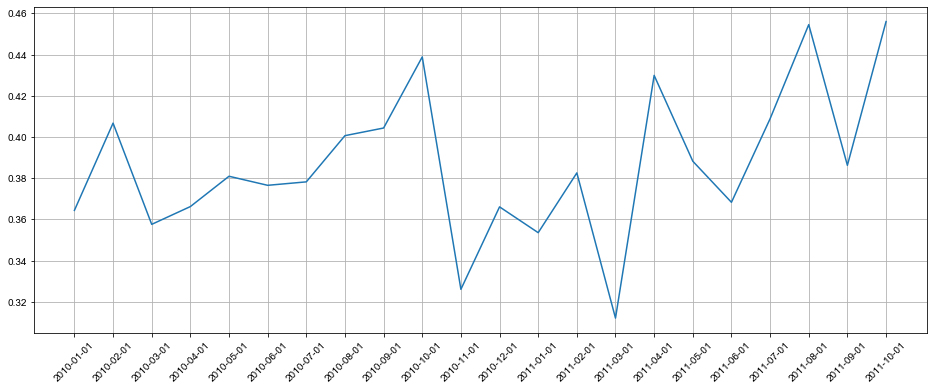

In [145]:
plt.figure(figsize=(16,6))
monthly_retention['留存率'].plot()
x_label = monthly_retention['购买年月'].astype(str).to_list()
plt.xticks(monthly_retention.index, x_label,rotation=45)
plt.grid(True)